In [1]:
import torch
import torch.optim as opt
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mb_size = 64   #Mini-batch size

def get_indices(dataset):
    indices =  []
    for i in range(len(dataset.targets)):  #use train_labels if error with tragets 
        if dataset.targets[i] == 2 or dataset.targets[i] == 4 or dataset.targets[i] == 6:
            indices.append(i)   #indices of data with labels 2, 4 or 6
    return indices

trainData = torchvision.datasets.MNIST('../data/', download=True, transform=transforms.ToTensor(), train=True)

idx = get_indices(trainData)
print(len(idx))

trainLoader = torch.utils.data.DataLoader(trainData,batch_size=mb_size, 
                                          sampler = torch.utils.data.sampler.SubsetRandomSampler(idx))

17718


In [3]:
# No. of training data = 17718

In [4]:
dataIter = iter(trainLoader)

imgs, labels = dataIter.next()

In [5]:
imgs.shape  #shape of the tensor data obtained from the train loader

torch.Size([64, 1, 28, 28])

In [6]:
#visualization of data on a grid
def imshow(imgs):
    imgs = torchvision.utils.make_grid(imgs)
    npimgs = imgs.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimgs, (1,2,0)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

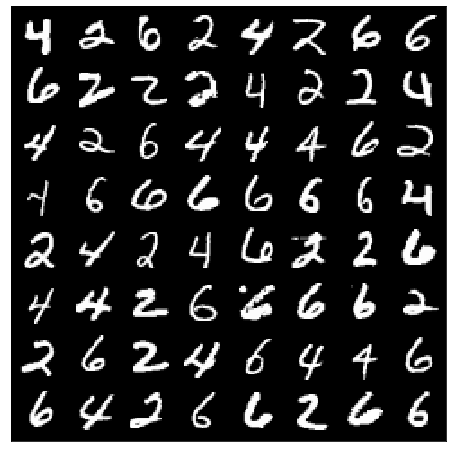

In [7]:
imshow(imgs) #using imshow() to obtain the grid

![Generative Adversarial Network](https://www.kdnuggets.com/wp-content/uploads/generative-adversarial-network.png)

In [8]:
Z_dim = 100  #size of the generated data
H_dim = 128  #no. of hidden neurons
X_dim = imgs.view(imgs.size(0), -1).size(1) #output neurons to generate an image

print(Z_dim, H_dim, X_dim)

100 128 784


In [9]:
#neural network for generative network
class Gen(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(Z_dim, H_dim),
            nn.ReLU(),
            nn.Linear(H_dim, X_dim),
            nn.Sigmoid()
        )
          
    def forward(self, input):
        return self.model(input)

In [10]:
G = Gen().cuda()

In [11]:
#neural network for discriminative model
class Dis(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_dim, H_dim),
            nn.ReLU(),
            nn.Linear(H_dim, 1),
            nn.Sigmoid()
        )
        
    def forward(self, input):
        return self.model(input)

In [12]:
D = Dis().cuda()

In [13]:
#print the network architecture
print(G)
print(D)

Gen(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)
Dis(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [14]:
lr = 1e-3  #learning rate
#optimizers for both models
g_opt = opt.Adam(G.parameters(), lr=lr)
d_opt = opt.Adam(D.parameters(), lr=lr)

Epoch:0,   G_loss:3.6800568889194447,    D_loss:0.3425649377090406


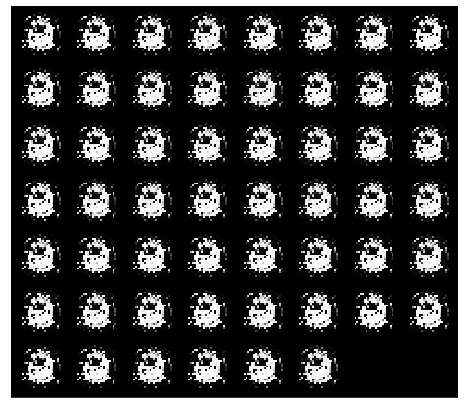

Epoch:1,   G_loss:4.494539626668937,    D_loss:0.09443907359352718
Epoch:2,   G_loss:5.750328779220581,    D_loss:0.06224279665465497
Epoch:3,   G_loss:4.752011364547784,    D_loss:0.08857206838198732
Epoch:4,   G_loss:5.105994487066992,    D_loss:0.06334878685833745
Epoch:5,   G_loss:5.598797716388633,    D_loss:0.09630185085271455


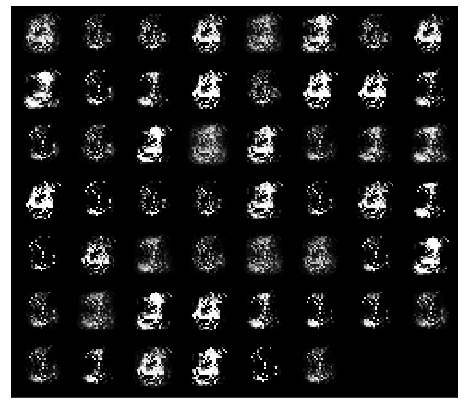

Epoch:6,   G_loss:4.250124411462447,    D_loss:0.12957997088882037
Epoch:7,   G_loss:4.075471591433033,    D_loss:0.14452847854540235
Epoch:8,   G_loss:4.374524356656126,    D_loss:0.15986640213413789
Epoch:9,   G_loss:3.9716243950468537,    D_loss:0.23298220051324756
Epoch:10,   G_loss:3.982731134022186,    D_loss:0.2417294521032688


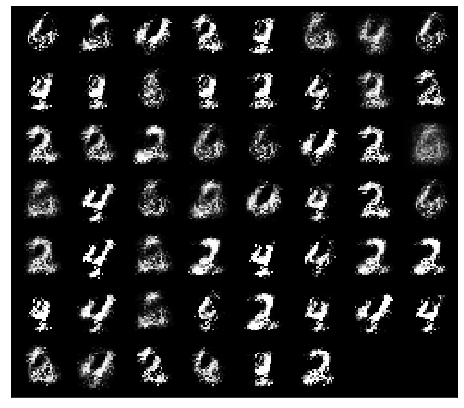

Epoch:11,   G_loss:3.96845185025074,    D_loss:0.28911756888193346
Epoch:12,   G_loss:4.093563227016573,    D_loss:0.37526367129993354
Epoch:13,   G_loss:4.042967531224881,    D_loss:0.33844077608645606
Epoch:14,   G_loss:3.368574257792118,    D_loss:0.44293638902450727
Epoch:15,   G_loss:3.5947637437483033,    D_loss:0.42530850694928357


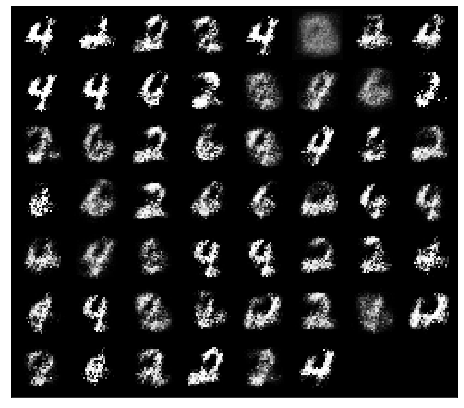

Epoch:16,   G_loss:3.4505357613202037,    D_loss:0.5639207661689835
Epoch:17,   G_loss:3.152983361633246,    D_loss:0.595054471320624
Epoch:18,   G_loss:3.0318162828576263,    D_loss:0.5917719630558138
Epoch:19,   G_loss:2.864602584270794,    D_loss:0.6461898551090529
Epoch:20,   G_loss:3.0220649380115825,    D_loss:0.6743421514757273


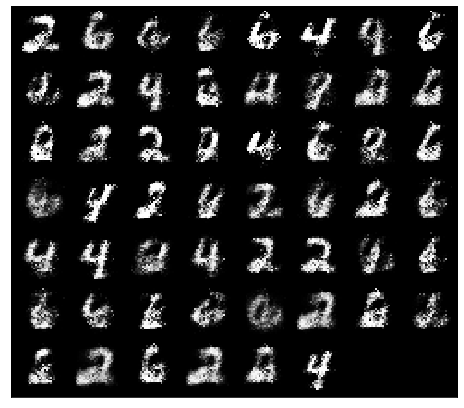

Epoch:21,   G_loss:2.7598019661886166,    D_loss:0.7140122879067913
Epoch:22,   G_loss:2.7435489712209047,    D_loss:0.7963126599788666
Epoch:23,   G_loss:2.6236783244549584,    D_loss:0.7928441560655725
Epoch:24,   G_loss:2.7880083391382375,    D_loss:0.8245617191068533
Epoch:25,   G_loss:2.536262813027585,    D_loss:0.9433552985372096


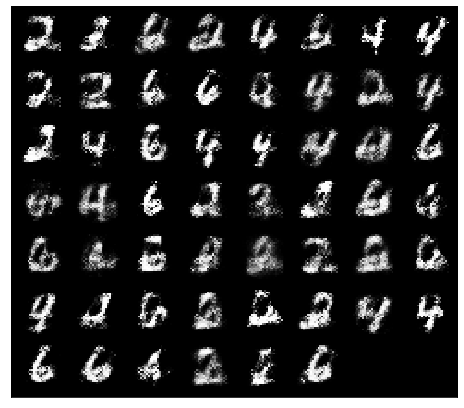

Epoch:26,   G_loss:2.39870145863144,    D_loss:0.9755432989838321
Epoch:27,   G_loss:2.1409667648563317,    D_loss:1.0283786260694372
Epoch:28,   G_loss:2.2729221393055004,    D_loss:1.0377298212653894
Epoch:29,   G_loss:2.3293652082608496,    D_loss:0.9577869974103645
Epoch:30,   G_loss:2.283266972979053,    D_loss:1.0546626672417678


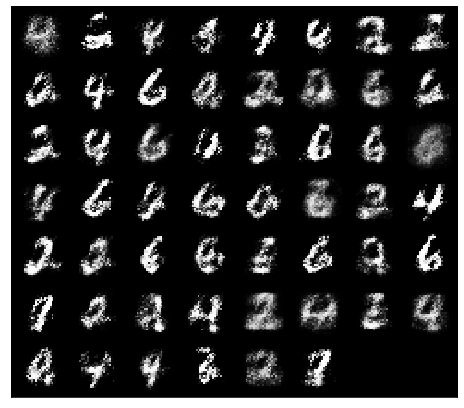

Epoch:31,   G_loss:2.2133747162801694,    D_loss:1.045577648314328
Epoch:32,   G_loss:2.018576909058361,    D_loss:1.0842044620307345
Epoch:33,   G_loss:1.9642584874741869,    D_loss:1.0138832705115584
Epoch:34,   G_loss:1.9500687414988713,    D_loss:1.050592828958904
Epoch:35,   G_loss:1.93982183115577,    D_loss:1.0821996410831218


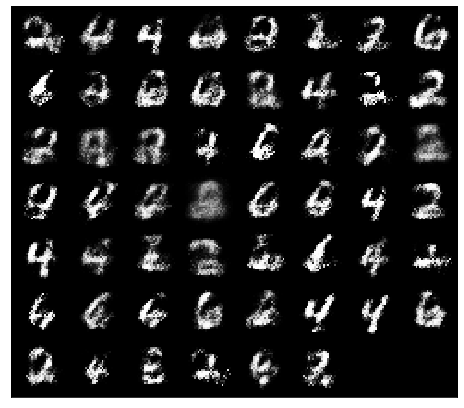

Epoch:36,   G_loss:1.967313775947378,    D_loss:1.017558305917664
Epoch:37,   G_loss:1.8056136959296272,    D_loss:1.048223974472349
Epoch:38,   G_loss:1.8418401152648651,    D_loss:1.014721545932095
Epoch:39,   G_loss:1.848913615791376,    D_loss:1.0010426819109315
Epoch:40,   G_loss:2.052296202535664,    D_loss:0.9531581128547338


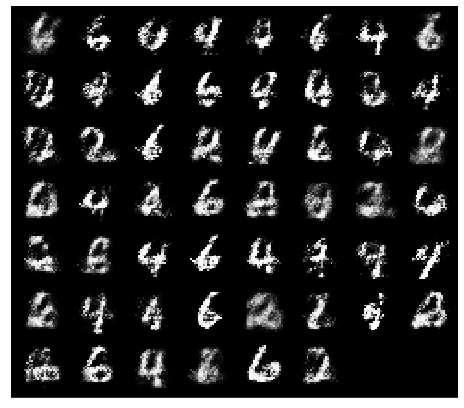

Epoch:41,   G_loss:1.8755224323444848,    D_loss:0.9715608635964377
Epoch:42,   G_loss:1.9391850697865125,    D_loss:0.9838192562979481
Epoch:43,   G_loss:1.8356276014651633,    D_loss:0.9915652834551429
Epoch:44,   G_loss:1.6911413932104833,    D_loss:1.0295216475583155
Epoch:45,   G_loss:1.7059778306458402,    D_loss:1.0967752158856994


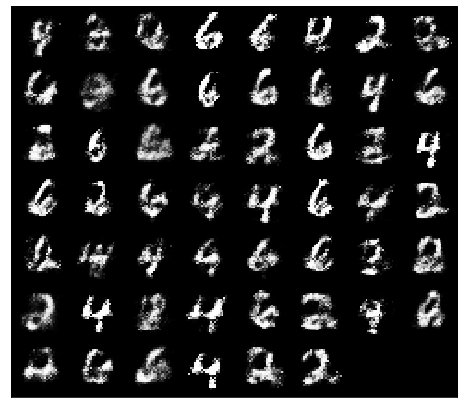

Epoch:46,   G_loss:1.692922419589349,    D_loss:1.0355408449895975
Epoch:47,   G_loss:1.6744779417230764,    D_loss:1.053364012000363
Epoch:48,   G_loss:1.6816318413841165,    D_loss:1.0641800190997899
Epoch:49,   G_loss:1.6642404467620575,    D_loss:1.069295979579003
Epoch:50,   G_loss:1.6024084168651043,    D_loss:1.0719554004686405


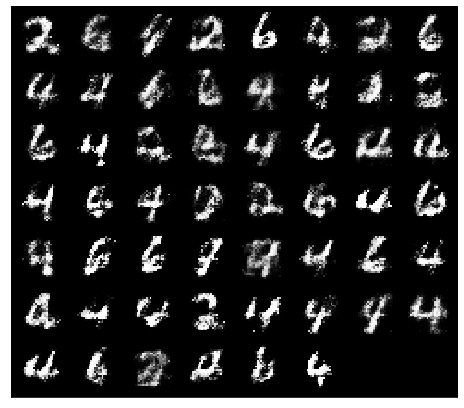

Epoch:51,   G_loss:1.511416701203219,    D_loss:1.0835381970078506
Epoch:52,   G_loss:1.6422788205990293,    D_loss:1.0411170288543838
Epoch:53,   G_loss:1.5392701350394569,    D_loss:1.0757008681228446
Epoch:54,   G_loss:1.5974379872587183,    D_loss:1.0539912174755055
Epoch:55,   G_loss:1.6673322984888235,    D_loss:1.048882320254288


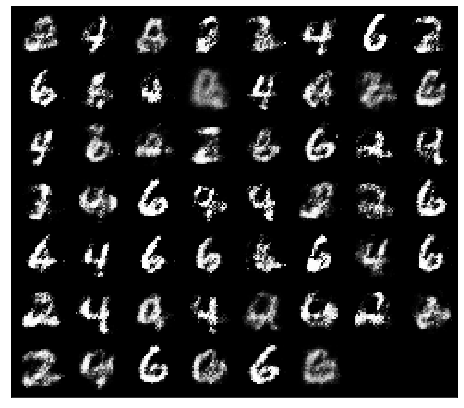

Epoch:56,   G_loss:1.592721500121299,    D_loss:1.0577935795921711
Epoch:57,   G_loss:1.5606747504175784,    D_loss:1.0937775702683072
Epoch:58,   G_loss:1.6297062622511,    D_loss:1.0568041330210138
Epoch:59,   G_loss:1.6038941433283396,    D_loss:1.0496915710101489
Epoch:60,   G_loss:1.6167315569595309,    D_loss:1.0340449074115134


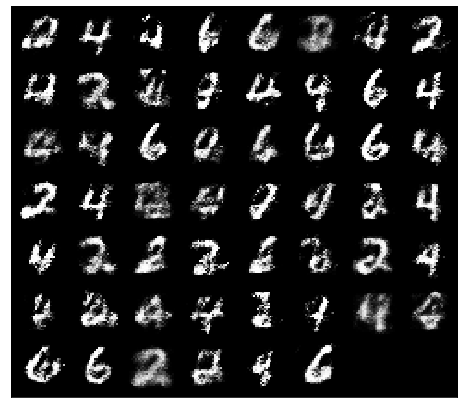

Epoch:61,   G_loss:1.546249097865411,    D_loss:1.053604157392729
Epoch:62,   G_loss:1.6039421627237478,    D_loss:1.0130648399948643
Epoch:63,   G_loss:1.4850847325170082,    D_loss:1.0986525784330679
Epoch:64,   G_loss:1.641029053646735,    D_loss:1.0187551736401306
Epoch:65,   G_loss:1.6324764365323614,    D_loss:1.0172904039117834


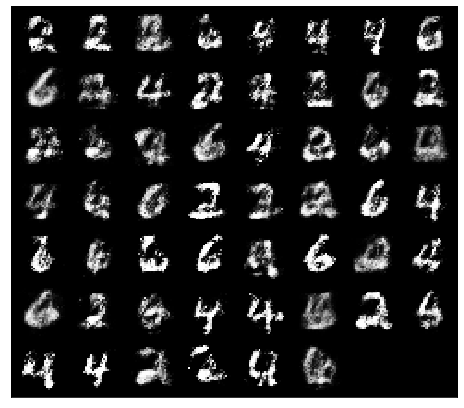

Epoch:66,   G_loss:1.5211919300823005,    D_loss:1.0602878728067833
Epoch:67,   G_loss:1.5689596815660112,    D_loss:1.0635096501787646
Epoch:68,   G_loss:1.5319265570451206,    D_loss:1.0951286096004802
Epoch:69,   G_loss:1.5330308712346459,    D_loss:1.034908737301396
Epoch:70,   G_loss:1.5217239374718512,    D_loss:1.0595095433052697


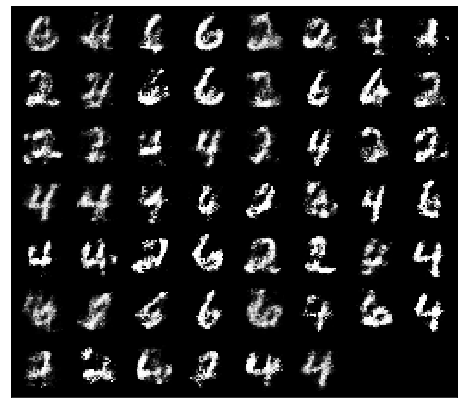

Epoch:71,   G_loss:1.5458032129473636,    D_loss:1.057403449762599
Epoch:72,   G_loss:1.5264066961267795,    D_loss:1.0552654985056027
Epoch:73,   G_loss:1.52249475764884,    D_loss:1.0481901676646208
Epoch:74,   G_loss:1.5253693127890355,    D_loss:1.0564413143839646
Epoch:75,   G_loss:1.4409446578593892,    D_loss:1.0781739941572885


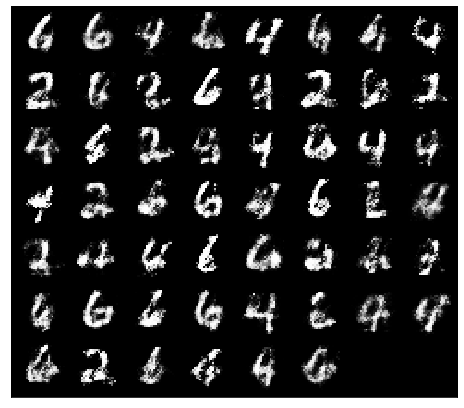

Epoch:76,   G_loss:1.4143861854980138,    D_loss:1.0739923427251272
Epoch:77,   G_loss:1.448577888605827,    D_loss:1.044074162894638
Epoch:78,   G_loss:1.4584796914985465,    D_loss:1.0610987382675336
Epoch:79,   G_loss:1.439866208858008,    D_loss:1.0640462989841557
Epoch:80,   G_loss:1.5066097079631653,    D_loss:1.0108176073873085


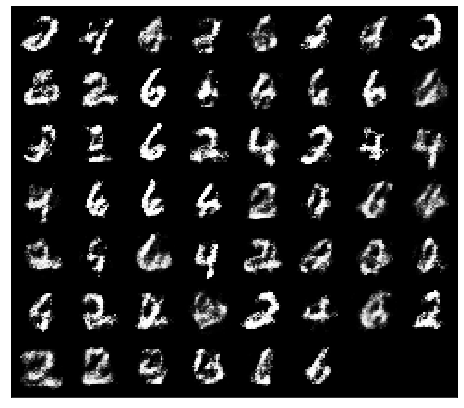

Epoch:81,   G_loss:1.5372913994083335,    D_loss:1.0096057541533927
Epoch:82,   G_loss:1.512931698496161,    D_loss:1.0122873942344197
Epoch:83,   G_loss:1.514588594006287,    D_loss:1.0323717688825587
Epoch:84,   G_loss:1.4760667703211954,    D_loss:1.0110032506798148
Epoch:85,   G_loss:1.4936179178716473,    D_loss:1.0098725165701086


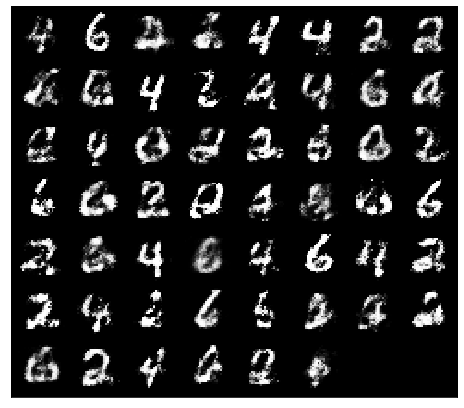

Epoch:86,   G_loss:1.4132764819296688,    D_loss:1.0649650284099235
Epoch:87,   G_loss:1.4451101876338035,    D_loss:1.0689053696845843
Epoch:88,   G_loss:1.4673866369233666,    D_loss:1.0383687408822537
Epoch:89,   G_loss:1.4082233970346003,    D_loss:1.0630960778639205
Epoch:90,   G_loss:1.4381301751635995,    D_loss:1.0694167467661282


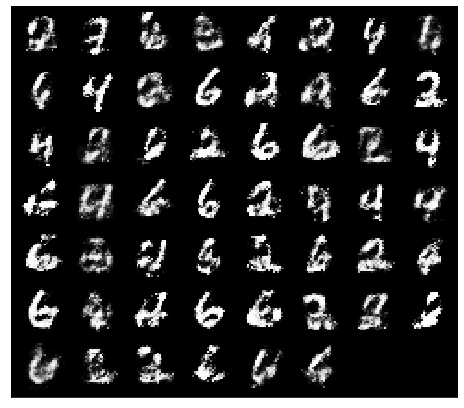

Epoch:91,   G_loss:1.4613314694876276,    D_loss:1.0541780539368033
Epoch:92,   G_loss:1.3983749624624149,    D_loss:1.0457727790739562
Epoch:93,   G_loss:1.4089531872677028,    D_loss:1.0498004172683193
Epoch:94,   G_loss:1.3720774538680534,    D_loss:1.05789820016076
Epoch:95,   G_loss:1.3832501383895048,    D_loss:1.0747192375066048


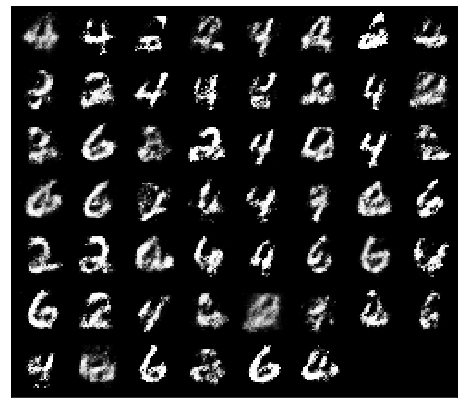

Epoch:96,   G_loss:1.409748290420009,    D_loss:1.0278096293714503
Epoch:97,   G_loss:1.3280357096599757,    D_loss:1.102585120967149
Epoch:98,   G_loss:1.300107001397584,    D_loss:1.085260709270243
Epoch:99,   G_loss:1.3123828983909387,    D_loss:1.1075206259097434


In [15]:
for epoch in range(100):
    G_loss_run = 0.0
    D_loss_run = 0.0
    if(epoch%10):
        lr *= 0.1
    for i, data in enumerate(trainLoader):
        X, _ = data
        X = X.view(X.size(0), -1)
        mb_size = X.size(0)
        
        one_labels = torch.ones(mb_size, 1).cuda()
        zero_labels = torch.zeros(mb_size, 1).cuda()
        
        z = torch.randn(mb_size, Z_dim).cuda()
        
        D_fake = D(G(z))
        G_loss = F.binary_cross_entropy(D_fake, one_labels)  #loss -(1/m)(log (1-D(G(z))))
        
        g_opt.zero_grad()
        G_loss.backward()
        g_opt.step()
        
        z = torch.randn(mb_size, Z_dim).cuda()
        
        D_real = D(X.cuda())
        D_fake = D(G(z))
        
        D_real_loss = F.binary_cross_entropy(D_real, one_labels)  #loss -(1/m)(log D(x))
        D_fake_loss = F.binary_cross_entropy(D_fake, zero_labels)  #loss -(1/m)(log(1-D(G(z))))
        D_loss = D_real_loss + D_fake_loss
        
        d_opt.zero_grad()
        D_loss.backward()
        d_opt.step()
        
#         z = torch.randn(mb_size, Z_dim)
        
#         D_fake = D(G(z))
#         G_loss = F.binary_cross_entropy(D_fake, one_labels)  #loss -(1/m)(log (1-D(G(z))))
        
#         g_opt.zero_grad()
#         G_loss.backward()
#         g_opt.step()
        
        G_loss_run += G_loss.item()
        D_loss_run += D_loss.item()
        
    print('Epoch:{},   G_loss:{},    D_loss:{}'.format(epoch, G_loss_run/(i+1), D_loss_run/(i+1)))
    
    if(epoch%5 ==0):
        with torch.no_grad():
            samples = G(z).cpu().detach()
            samples = samples.view(samples.size(0), 1, 28, 28)
            imshow(samples)